In [3]:

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.9.2'

In [5]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 895 images belonging to 2 classes.
Found 399 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.regularizers import l2

In [10]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
28/28 [==============================] - 202s 7s/step - loss: 0.1946 - accuracy: 0.9385 - val_loss: 0.2136 - val_accuracy: 0.9173
Epoch 2/25
28/28 [==============================] - 6s 226ms/step - loss: 0.1640 - accuracy: 0.9397 - val_loss: 0.1980 - val_accuracy: 0.9173
Epoch 3/25
28/28 [==============================] - 6s 224ms/step - loss: 0.1414 - accuracy: 0.9397 - val_loss: 0.1742 - val_accuracy: 0.9173
Epoch 4/25
28/28 [==============================] - 6s 223ms/step - loss: 0.1421 - accuracy: 0.9397 - val_loss: 0.1709 - val_accuracy: 0.9173
Epoch 5/25
28/28 [==============================] - 6s 229ms/step - loss: 0.1308 - accuracy: 0.9408 - val_loss: 0.1620 - val_accuracy: 0.9198
Epoch 6/25
28/28 [==============================] - 6s 225ms/step - loss: 0.1230 - accuracy: 0.9408 - val_loss: 0.1555 - val_accuracy: 0.9373
Epoch 7/25
28/28 [==============================] - 6s 220ms/step - loss: 0.1242 - accuracy: 0.9430 - val_loss: 0.1527 - val_accuracy: 0.9474
Epoch 8

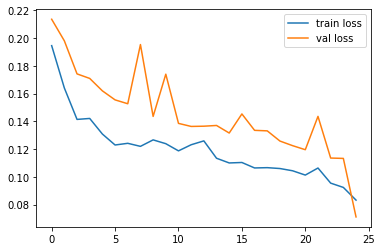

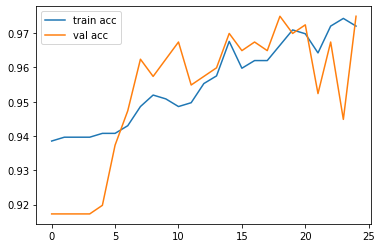

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model


cnn.save('seatbelt.h5')

In [16]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('seatbelt.h5')

In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [28]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/data/test/no seatbelt/young-woman-driving-a-car-elegant-business-lady-driving-an-expensive-car.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 24ms/step


In [29]:
result

array([[-0.89853877]], dtype=float32)

In [30]:
if result[0]<0:
    print("The image classified is no seat belt")
else:
    print("The image classified is with seat belt")

The image classified is no seat belt


In [31]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/data/test/seat_belt/221JBW5TMVMO.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 20ms/step


In [32]:
result

array([[1.6746218]], dtype=float32)

In [33]:
if result[0]<0:
    print("The image classified is no seat belt")
else:
    print("The image classified is with seat belt")

The image classified is with seat belt
